## **第 4 回　株価データ**
---
---

### **これまでのまとめ**
#### 1. Apple Inc.の日次の株価（Open、High、Low、Close、Volume）をダウンロードしてまとめた。

In [2]:
import pandas as pd
import yfinance as yf

# ダウンロードしたい株価データの銘柄シンボルを指定
symbol = "AAPL"  # Apple Inc.の例

# ダウンロードしたい期間を指定します（開始日と終了日）
start_date = "2019-01-01"
end_date = "2022-12-31"

# Yahoo Financeから株価データをダウンロード
data = yf.download(symbol, start=start_date, end=end_date)

# ダウンロードしたデータを表示
df = pd.DataFrame(data)
df = df.drop('Adj Close', axis=1)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,164101200
...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,85438400


#### 2. 終値（Close）に対して ADF検定やKPSS 検定を行ったら非定常過程と判定された。

In [3]:
# ADF 検定
# 帰無仮説 : 時系列は非定常である
from statsmodels.tsa.stattools import adfuller

def ADF(data):
    result = adfuller(data)

    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values:")
    for key, value in result[4].items():
        print(f'\t {key} : {value}')

    if result[1] < 0.05:
        print("p-value < 0.05 なので帰無仮説を棄却：時系列は定常過程")
    else:
        print("p-value > 0.05 なので帰無仮説を棄却できない：時系列は非定常過程")

ADF(df.Close)

ADF Statistic: -1.681306337710011
p-value: 0.44076883534661077
Critical Values:
	 1% : -3.436866962597422
	 5% : -2.864417284603703
	 10% : -2.5683020002450507
p-value > 0.05 なので帰無仮説を棄却できない：時系列は非定常過程


In [4]:
# KPSS 検定
# 帰無仮説 : 時系列は定常である
from statsmodels.tsa.stattools import kpss
import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning

def KPSS(data):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=InterpolationWarning)
    
        result = kpss(data)

        print(f"KPSS Statistic: {result[0]}")
        print(f"p-value: {result[1]}")
        print(f'Number of lags used: {result[2]}')
        print(f"Critical Values:")
        for key, value in result[3].items():
            print(f'\t {key} : {value}')

        if result[1] < 0.05:
            print("p-value < 0.05 なので帰無仮説を棄却：時系列は非定常過程")        
        else:
            print("p-value > 0.05 なので帰無仮説を棄却できない：時系列は定常過程")

KPSS(df.Close)

KPSS Statistic: 4.761119334849695
p-value: 0.01
Number of lags used: 19
Critical Values:
	 10% : 0.347
	 5% : 0.463
	 2.5% : 0.574
	 1% : 0.739
p-value < 0.05 なので帰無仮説を棄却：時系列は非定常過程


#### 3. 始値（Open）と終値（Close）を使った対数収益率 OtoC を定義。

In [5]:
import numpy as np

# 対数収益率を計算
df['OtoC'] = np.log(df['Close'] / df['Open'])
df

,Open,High,Low,Close,Volume,OtoC
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,148158800,0.019373
2019-01-03,35.994999,36.430000,35.500000,35.547501,365248800,-0.012510
2019-01-04,36.132500,37.137501,35.950001,37.064999,234428400,0.025480
2019-01-07,37.174999,37.207500,36.474998,36.982498,219111200,-0.005192
2019-01-08,37.389999,37.955002,37.130001,37.687500,164101200,0.007925
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,63814900,0.007154
2022-12-27,131.380005,131.410004,128.720001,130.029999,69007800,-0.010329
2022-12-28,129.669998,131.029999,125.870003,126.040001,85438400,-0.028393


#### 4. OtoC に対して ADF検定や KPSS 検定を行ったら定常過程と判定された。

In [6]:
ADF(df.OtoC)

ADF Statistic: -6.686257430754117
p-value: 4.218702145953401e-09
Critical Values:
	 1% : -3.4369994990319355
	 5% : -2.8644757356011743
	 10% : -2.5683331327427803
p-value < 0.05 なので帰無仮説を棄却：時系列は定常過程


In [7]:
KPSS(df.OtoC)

KPSS Statistic: 0.20079517910821928
p-value: 0.1
Number of lags used: 1
Critical Values:
	 10% : 0.347
	 5% : 0.463
	 2.5% : 0.574
	 1% : 0.739
p-value > 0.05 なので帰無仮説を棄却できない：時系列は定常過程


### <span style="color: red">**以下では、対数収益率を使う。**</span>

---
---
#### **課題**
1. ダウ・ジョーンズ工業平均 (Dow Jones Industrial Average: DJIA)を構成する 30 銘柄（以下、DJ30 と呼ぶ）を調べ、DJ30.tsv という名前のファイルにまとめて下さい。その後、pandas の DataFrame で表示して下さい。ヒント：Wikipedia を参照。

解答例

<img src="figs/1.jpg" width="800px">

---
2. DJ30 の終値を pandas の DataFrame にまとめて下さい。期間は start_date = "2019-01-01"，end_date = "2022-12-31"とします。その後、欠損値を調べて、欠損値が入っている日付のデータを削除して下さい。また、その結果をフォルダ data に data/DJ30_Close.tsv という名前のファイルで保存して下さい。tsv ですから、区切りをタブにすることを忘れないように。 

解答例

<img src="figs/2.jpg" width="700px">

<img src="figs/3.jpg" width="900px">

---
3. 課題 2. で作った DataFrame に対して matplotlib を使って、すべての株式のグラフを可視化して下さい。全部で 30 個のグラフ。

解答例

<img src="figs/4.jpg" width="900px">

---
4. 問題 3. のグラフを比較してわかったことを説明して下さい。

解答例（省略）

---
5. Apple の場合に計算したように、DJ30 の構成銘柄のそれぞれに対して対数収益率（Open to Close）を計算して pd の DataFrame にまとめて下さい。ただし、問題 2. で欠損値を削除した結果残った日付に注意してデータを収集、整理すること。また、その結果をフォルダ data に data/DJ30_OtoC.tsv という名前のファイルで保存して下さい。tsv ですから、区切りをタブにすることを忘れないように。 

解答例

<img src="figs/5.jpg" width="800px">

---
6. 課題 5. で作った DataFrame に対して matplotlib を使って、すべての株式のグラフを可視化して下さい。全部で 30 個のグラフ。

解答例

<img src="figs/6.jpg" width="900px">

---
次回
1. 前回の授業で作った、対数収益率のデータ data/DJ30_OtoC.tsv を使って、df という名前の DataFrame を作って下さい。また、終値のデータ data/DJ30_Close.tsv を使って、df_c という名前の DataFrame を作って下さい。
2. 課題 1. で作った df に対して、基本的な統計量を計算して、平均値と分散が異なっていることを確認して下さい。
3. 課題 1. で作った df を使って、各銘柄の対数収益率を標準化（平均が 0 で分散が 1）して、df_s という名前の DataFrame を作って下さい。そして、確かに標準化できていることも確認して下さい。
4. 課題 3. で作った DataFrame から相関行列cm を作成して可視化して下さい。また、この結果からわかることを説明して下さい。
5. 相関行列の固有値を計算し、その分布をヒストグラムで可視化して下さい。また、この結果からわかることを説明して下さい。
6. 最大固有値の固有ベクトルと、終値の DataFrame である df_c との、行列の積を計算して下さい。
7. ダウ・ジョーンズ工業株価平均指数（ダウ平均株価指数；DJ30 指数）について調べて下さい。特に、計算方法について。また、DJ30 指数のデータを、^DJI というシンボルでダウンロードして pandas の DataFrame にまとめて下さい。
8. 問題 6. と問題 7. の時系列データを、最初の日付の値で割って、matplotlib を使ってグラフで可視化して下さい。また、この結果からわかることを説明して下さい。

In [13]:
import pandas as pd

# 2022年1月時点でのDJ30の銘柄とティッカーシンボル
dj31_data = [
    {"Company": "3M", "Ticker": "MMM"},
    {"Company": "American Express", "Ticker": "AXP"},
    {"Company": "Amgen", "Ticker": "AMGN"},
    {"Company": "Apple", "Ticker": "AAPL"},
    {"Company": "Boeing", "Ticker": "BA"},
    {"Company": "Caterpillar", "Ticker": "CAT"},
    {"Company": "Chevron", "Ticker": "CVX"},
    {"Company": "Cisco Systems", "Ticker": "CSCO"},
    {"Company": "The Coca-Cola Company", "Ticker": "KO"},
    {"Company": "Dow Inc.", "Ticker": "DOW"},
    {"Company": "Goldman Sachs", "Ticker": "GS"},
    {"Company": "The Home Depot", "Ticker": "HD"},
    {"Company": "Honeywell", "Ticker": "HON"},
    {"Company": "IBM", "Ticker": "IBM"},
    {"Company": "Intel", "Ticker": "INTC"},
    {"Company": "Johnson & Johnson", "Ticker": "JNJ"},
    {"Company": "JPMorgan Chase", "Ticker": "JPM"},
    {"Company": "McDonald's", "Ticker": "MCD"},
    {"Company": "Merck & Co.", "Ticker": "MRK"},
    {"Company": "Microsoft", "Ticker": "MSFT"},
    {"Company": "Nike", "Ticker": "NKE"},
    {"Company": "Procter & Gamble", "Ticker": "PG"},
    {"Company": "Salesforce", "Ticker": "CRM"},
    {"Company": "The Travelers Companies", "Ticker": "TRV"},
    {"Company": "UnitedHealth Group", "Ticker": "UNH"},
    {"Company": "Verizon Communications", "Ticker": "VZ"},
    {"Company": "Visa", "Ticker": "V"},
    {"Company": "Walmart", "Ticker": "WMT"},
    {"Company": "Walgreens Boots Alliance", "Ticker": "WBA"},
    {"Company": "The Walt Disney Company", "Ticker": "DIS"}
]

# リストをpandas DataFrameに変換
df_dj31 = pd.DataFrame(dj30_data)

# DataFrameをTSVファイルに保存
tsv_file_path = '/Users/shishishikakou/Downloads/データサイエンス特論/04/data/DJ31.tsv'
df_dj31.to_csv(tsv_file_path, sep='\t', index=False)

# 保存したTSVファイルを読み込んで表示
df_dj31_read = pd.read_csv(tsv_file_path, sep='\t')
df_dj31_read


,Company,Ticker
0,3M,MMM
1,American Express,AXP
2,Amgen,AMGN
3,Apple,AAPL
4,Boeing,BA
5,Caterpillar,CAT
6,Chevron,CVX
7,Cisco Systems,CSCO
8,The Coca-Cola Company,KO
9,Dow Inc.,DOW


In [18]:
import pandas as pd

df_dj30 = pd.read_csv('/Users/shishishikakou/Downloads/データサイエンス特論/04/data/DJ30.tsv', sep='\t', index_col=0)
df_dj30

,企業名,企業名2,業種,採用日,上場市場
AAPL,Apple Inc.,Apple,コンピュータ,2015年3月19日,NASDAQ
AMGN,Amgen Inc.,アムジェン,医薬品,2020年8月31日,NASDAQ
AXP,American Express Co.,アメリカン・エキスプレス,金融,1982年8月30日,NYSE
BA,Boeing Co.,ボーイング,航空機,1987年3月12日,NYSE
CAT,Caterpillar Inc.,キャタピラー,重機,1991年5月6日,NYSE
CRM,"Salesforce.com, Inc.",セールスフォース・ドットコム,ソフトウェア,2020年8月31日,NYSE
CSCO,"Cisco Systems, Inc.",シスコシステムズ,情報・通信業,2009年6月8日,NASDAQ
CVX,Chevron Corp.,シェブロン,石油,2008年2月19日,NYSE
DIS,The Walt Disney Co.,ウォルト・ディズニー・カンパニー,娯楽・メディア,1991年5月6日,NYSE
DOW,"Dow, Inc.",ダウ,化学,2019年4月2日,NYSE


In [20]:
import pandas as pd

In [22]:
start_date = "2019-01-01"
end_date = "2022-12-31"

df_dj = []

for smbol in df_dj30.index:
    data = yf.download(symbol, start=start_date, end=end_date)
    df = pd.DataFrame(data)
    df_dj.append(df.Close)

df = pd.concat(df_dj, axis=1)
df.columns = df_dj30.index
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,39.480000,39.480000,39.480000,39.480000,39.480000,39.480000,39.480000,39.480000,39.480000,39.480000,...,39.480000,39.480000,39.480000,39.480000,39.480000,39.480000,39.480000,39.480000,39.480000,39.480000
2019-01-03,35.547501,35.547501,35.547501,35.547501,35.547501,35.547501,35.547501,35.547501,35.547501,35.547501,...,35.547501,35.547501,35.547501,35.547501,35.547501,35.547501,35.547501,35.547501,35.547501,35.547501
2019-01-04,37.064999,37.064999,37.064999,37.064999,37.064999,37.064999,37.064999,37.064999,37.064999,37.064999,...,37.064999,37.064999,37.064999,37.064999,37.064999,37.064999,37.064999,37.064999,37.064999,37.064999
2019-01-07,36.982498,36.982498,36.982498,36.982498,36.982498,36.982498,36.982498,36.982498,36.982498,36.982498,...,36.982498,36.982498,36.982498,36.982498,36.982498,36.982498,36.982498,36.982498,36.982498,36.982498
2019-01-08,37.687500,37.687500,37.687500,37.687500,37.687500,37.687500,37.687500,37.687500,37.687500,37.687500,...,37.687500,37.687500,37.687500,37.687500,37.687500,37.687500,37.687500,37.687500,37.687500,37.687500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.860001,131.860001,131.860001,131.860001,131.860001,131.860001,131.860001,131.860001,131.860001,131.860001,...,131.860001,131.860001,131.860001,131.860001,131.860001,131.860001,131.860001,131.860001,131.860001,131.860001
2022-12-27,130.029999,130.029999,130.029999,130.029999,130.029999,130.029999,130.029999,130.029999,130.029999,130.029999,...,130.029999,130.029999,130.029999,130.029999,130.029999,130.029999,130.029999,130.029999,130.029999,130.029999
2022-12-28,126.040001,126.040001,126.040001,126.040001,126.040001,126.040001,126.040001,126.040001,126.040001,126.040001,...,126.040001,126.040001,126.040001,126.040001,126.040001,126.040001,126.040001,126.040001,126.040001,126.040001


In [23]:
# 欠損値があるかどうかを確認
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# 欠損値がある行を削除
df_cleaned = df.dropna()

# TSVファイルとして保存
df_cleaned.to_csv("data/DJ30_Close.tsv", sep='\t')


Missing values per column:
AAPL    0
AMGN    0
AXP     0
BA      0
CAT     0
CRM     0
CSCO    0
CVX     0
DIS     0
DOW     0
GS      0
HD      0
HON     0
IBM     0
INTC    0
JNJ     0
JPM     0
KO      0
MCD     0
MMM     0
MRK     0
MSFT    0
NKE     0
PG      0
TRV     0
UNH     0
V       0
VZ      0
WBA     0
WMT     0
dtype: int64


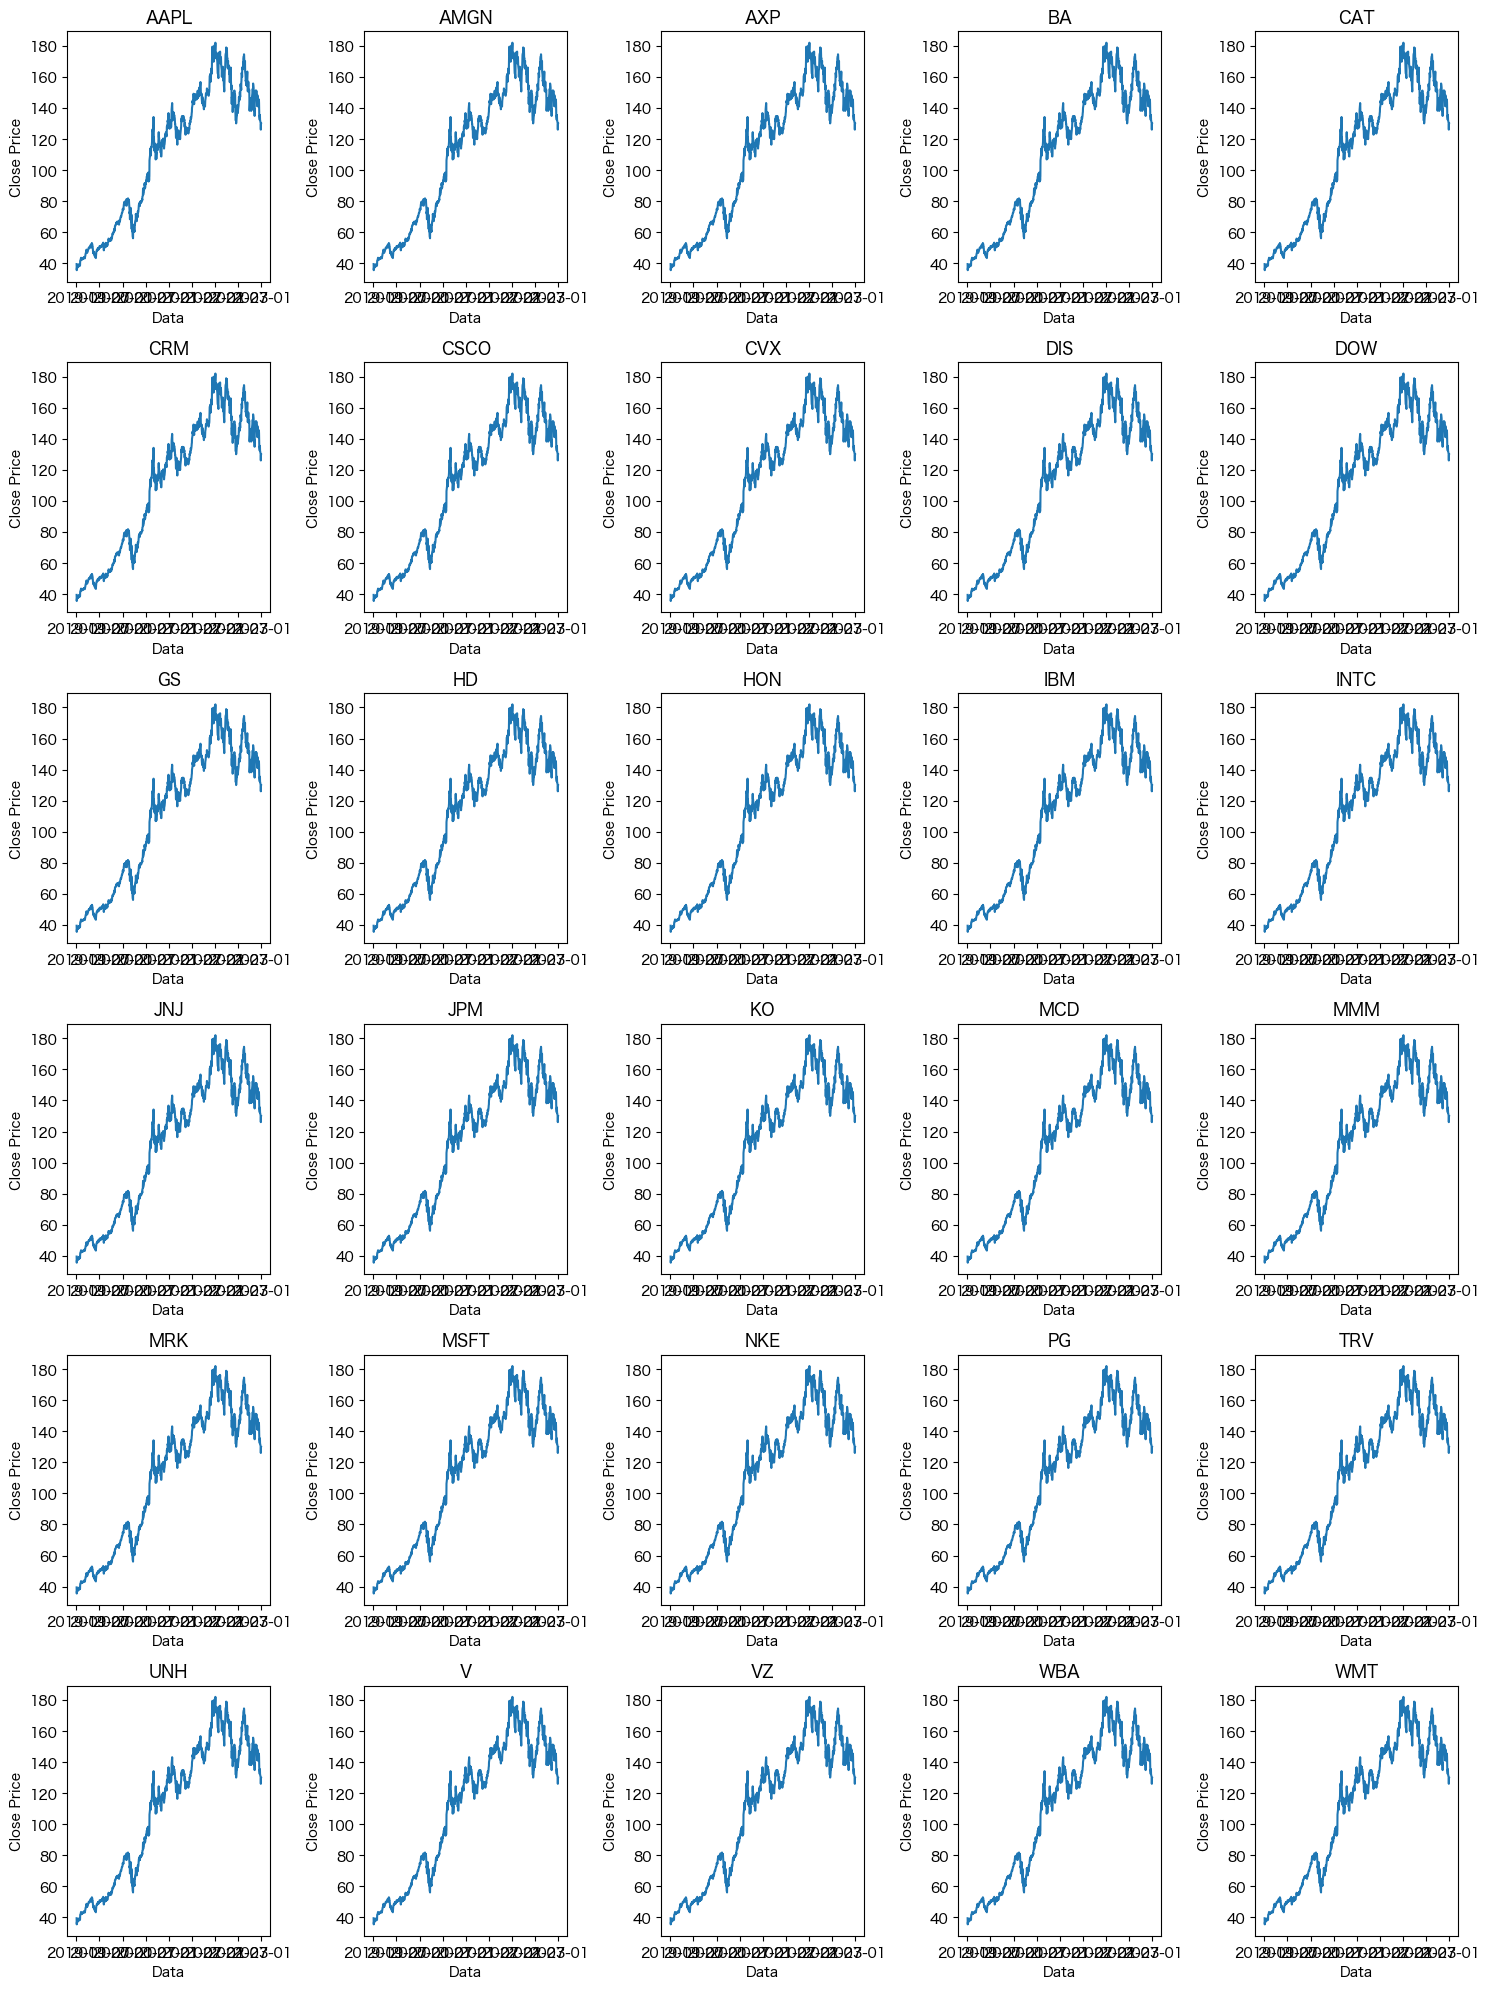

In [25]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15,20))

axes = axes.flatten()

# symbolは企業の名前 dataはその企業の株価
# df_cleaned.items()って何？: 企業の名前とその株価を一緒に取ってくる方法
# i, (symbol, data)って何？: iは「何番目の企業か」を教えてくれます。symbolは企業の名前です。dataはその企業の株価

for i , (symbol, data) in enumerate(df_cleaned.items()):
    axes[i].plot(data.index, data.values)
    axes[i].set_title(symbol)
    axes[i].set_xlabel('Data')
    axes[i].set_ylabel('Close Price')
"""
axes[i].plot(data.index, data.values): この行は、企業の株価を実際に描いています。
data.indexは日付です。つまり、この日付にどれだけ株価があるのかを描きます。
data.valuesはその日の株価です。
axes[i].set_title(symbol): この行は、グラフの上に企業の名前を書きます。

たとえば、Appleのグラフには「Apple」と書きます。
axes[i].set_xlabel('Date'): この行は、グラフの下側（x軸）に「Date」と書きます。

これで、下側の数字が「日付」であることがわかります。
axes[i].set_ylabel('Close Price'): この行は、グラフの左側（y軸）に「Close Price」と書きます。
"""
# グラフが密集している場合は、レイアウトを自動調整
plt.tight_layout()

plt.show()

In [29]:
# 空のDataFrameを作成して、対数収益率を格納する
log_returns_df = pd.DataFrame()

# 各企業について処理
for symbol in df_dj30.index:
    # yfinanceでデータを取得
    data = yf.download(symbol, start=start_date, end=end_date)
    
    # 対数収益率を計算
    log_return = np.log(data['Close'] / data['Open'])
    
    # 問題2で削除した欠損値を考慮（日付を合わせる）
    common_dates = log_return.index.intersection(df_cleaned.index)
    log_return = log_return.loc[common_dates]
    
    # 結果をDataFrameに追加
    log_returns_df[symbol] = log_return

# DataFrameを保存
log_returns_df.to_csv("data/DJ30_OtoC.tsv", sep='\t')
log_returns_df



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.019373,-0.003226,0.018672,0.023814,0.018770,0.015989,0.015723,0.030732,0.008016,NaN,...,0.003977,0.015648,0.017297,0.002743,-0.001022,-0.006182,0.022213,-0.002496,0.012423,0.018381
2019-01-03,-0.012510,-0.016635,-0.014451,-0.027255,-0.030794,-0.023345,-0.029509,-0.022675,-0.020018,NaN,...,-0.020322,-0.027343,-0.006849,-0.003304,-0.015411,-0.027608,-0.023754,-0.001422,-0.006956,-0.003762
2019-01-04,0.025480,0.020574,0.023523,0.032281,0.031550,0.032862,0.025246,0.004885,0.015353,NaN,...,0.020264,0.021920,0.016206,0.018001,0.017167,-0.000751,0.024311,-0.002304,0.016522,0.002465
2019-01-07,-0.005192,0.016853,0.004083,-0.007318,-0.002804,0.008473,0.008133,0.010747,0.005896,NaN,...,-0.009500,0.004124,0.013027,0.002282,0.000761,-0.001332,0.011904,-0.000705,0.011789,0.009779
2019-01-08,0.007925,0.007053,-0.000405,0.019033,-0.001001,0.006817,-0.000230,-0.014478,-0.003405,NaN,...,0.001580,-0.002332,-0.001302,-0.002592,-0.012984,0.003954,-0.008516,0.019196,0.011981,0.001472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.007154,-0.003631,0.012250,0.004294,0.012248,0.005500,0.004856,0.018777,0.022406,0.013062,...,0.005468,0.011035,0.001205,0.002033,0.009758,0.013663,0.008294,0.002607,0.001814,0.005021
2022-12-27,-0.010329,-0.008694,-0.006129,-0.000950,0.010128,0.016203,-0.002941,0.007095,-0.012084,0.005485,...,-0.002583,-0.007316,0.009315,0.008153,0.002839,-0.003640,0.001795,0.019553,-0.008059,-0.001598
2022-12-28,-0.028393,-0.011410,-0.015161,-0.004978,-0.015585,-0.009606,-0.013086,-0.010567,-0.022439,-0.023330,...,-0.016163,-0.010012,-0.022361,-0.015152,-0.014931,-0.012449,-0.008210,-0.009744,-0.017672,-0.015311


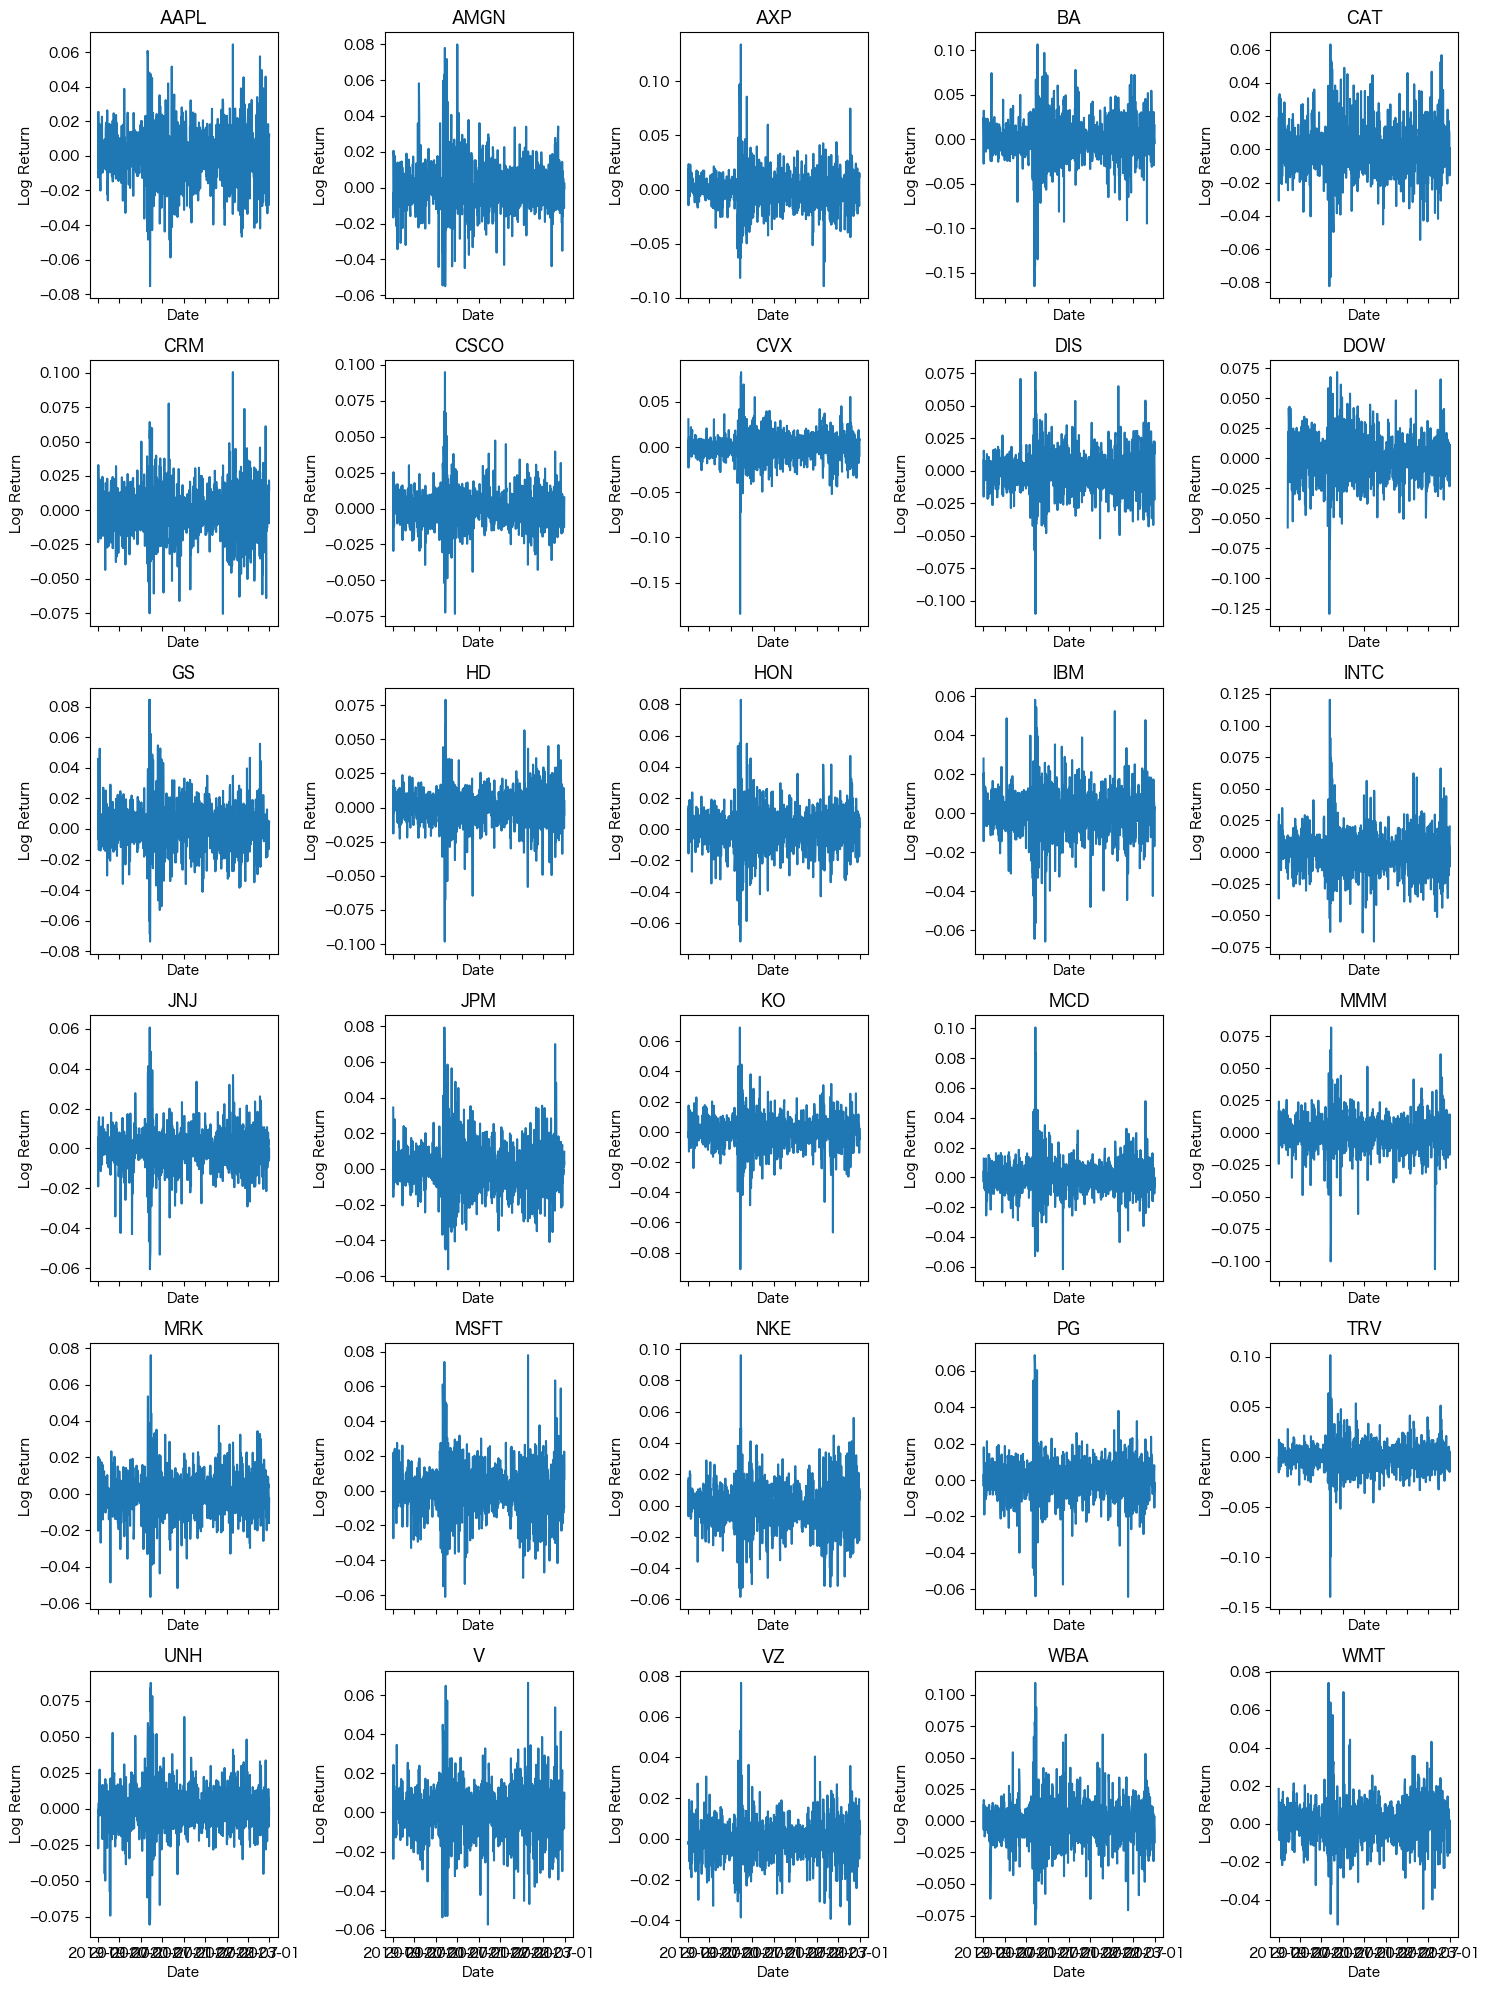

In [31]:
import matplotlib.pyplot as plt

# 30個のサブプロットを作成（6行 x 5列）
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 20), sharex=True)
axes = axes.flatten()  # 1次元配列に変換

# 各企業の対数収益率をプロット
for i, (symbol, log_return) in enumerate(log_returns_df.items()):
    axes[i].plot(log_return.index, log_return.values)
    axes[i].set_title(symbol)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Log Return')

# レイアウトを整える
plt.tight_layout()
plt.show()


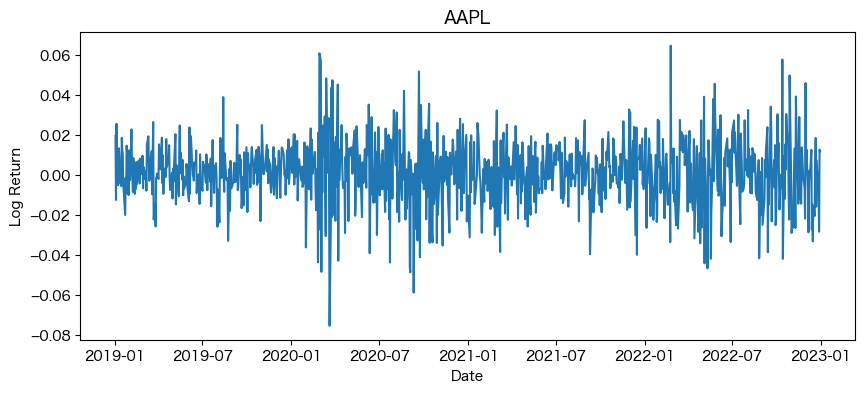

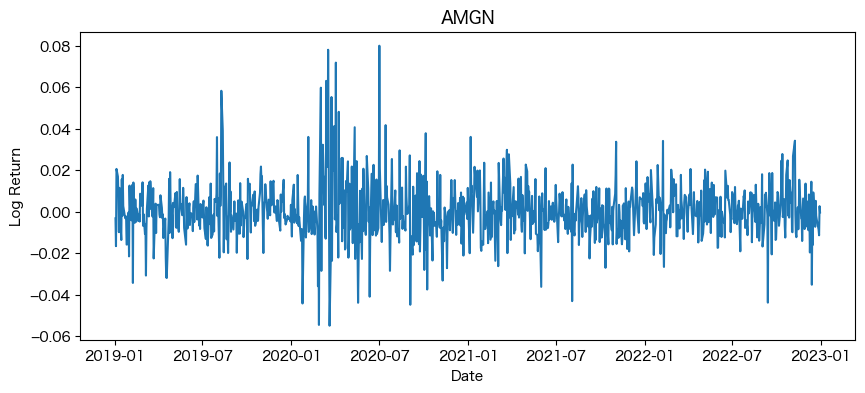

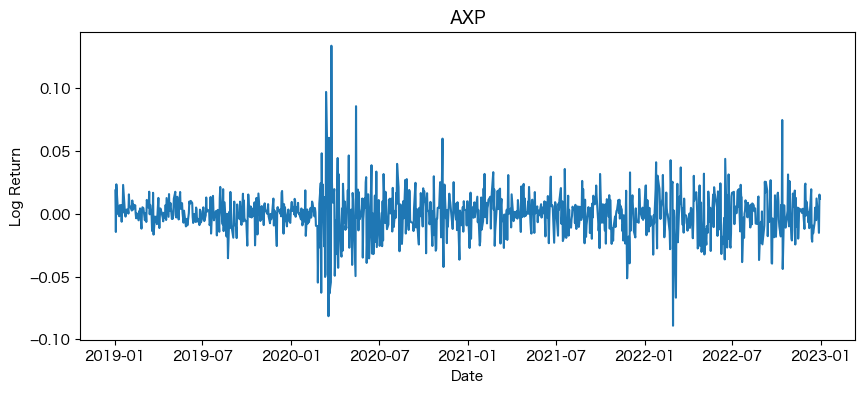

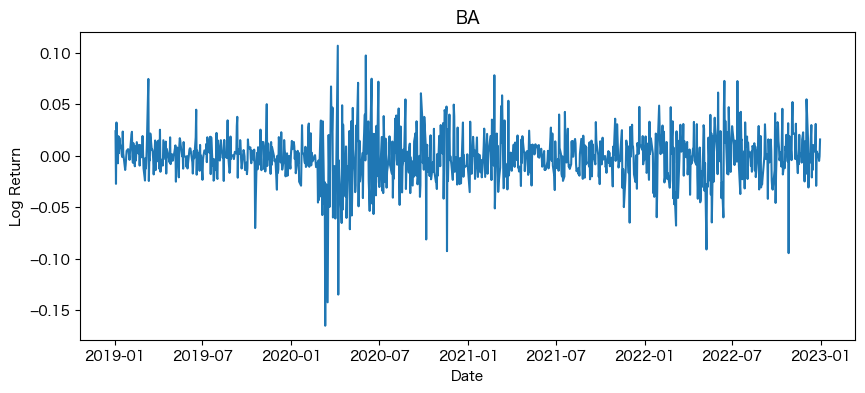

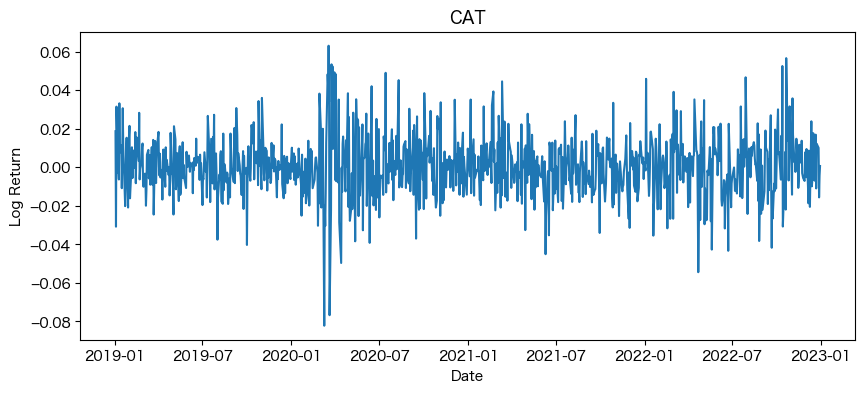

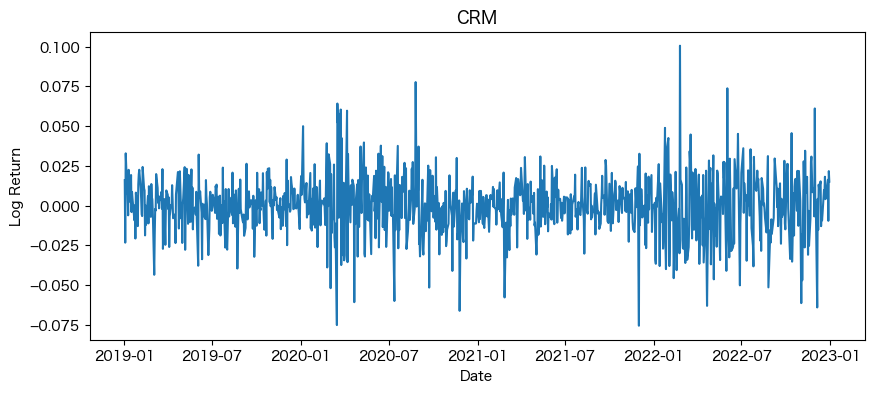

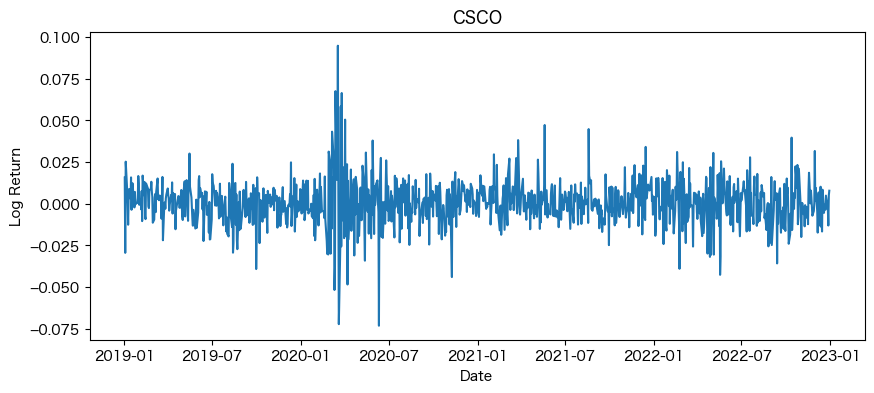

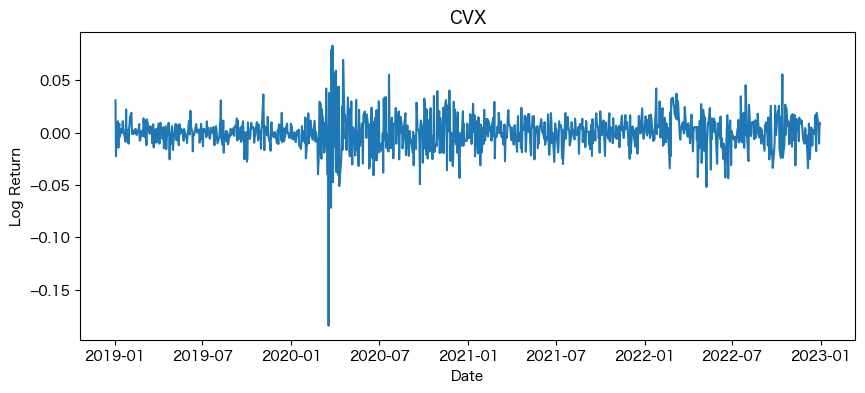

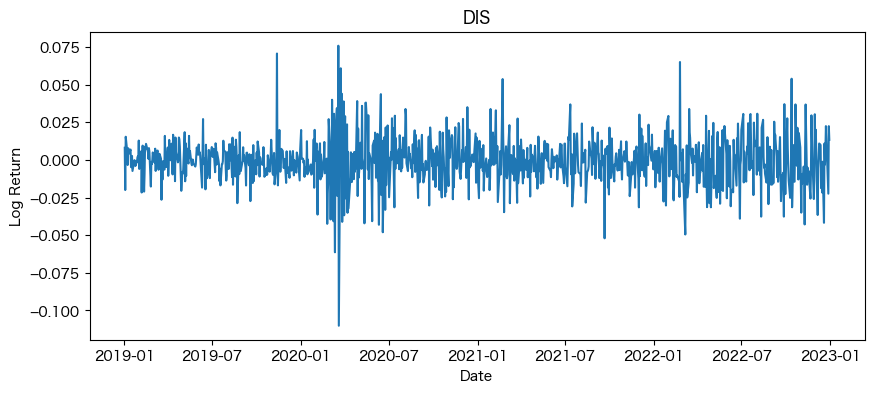

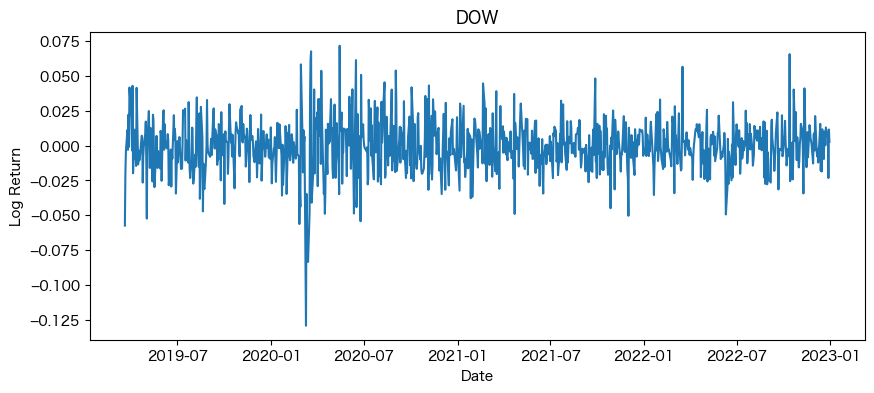

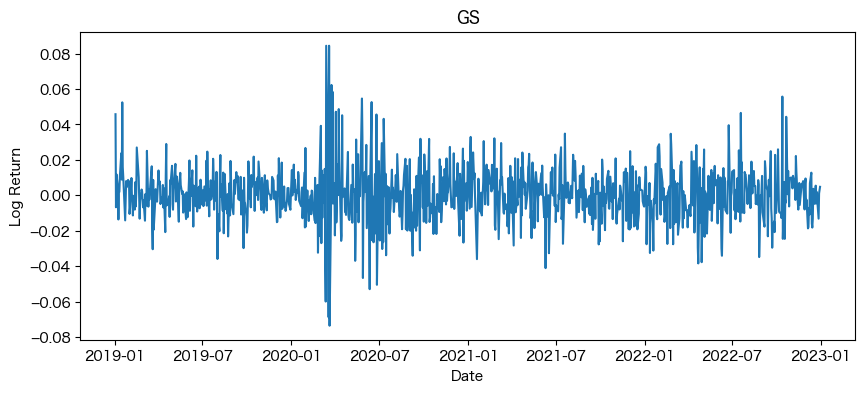

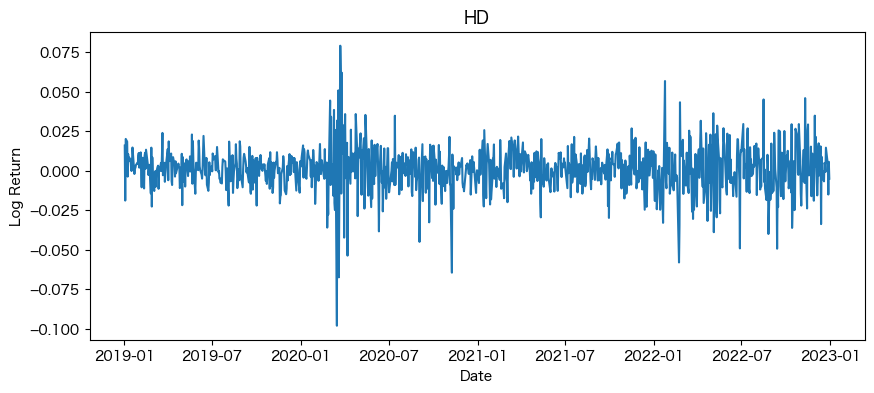

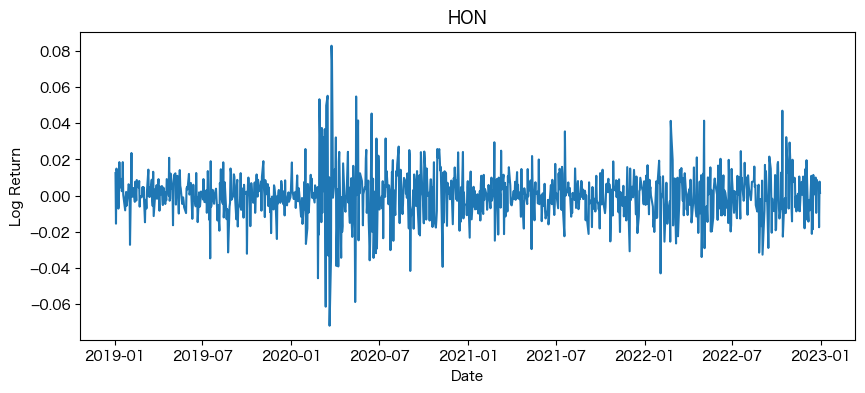

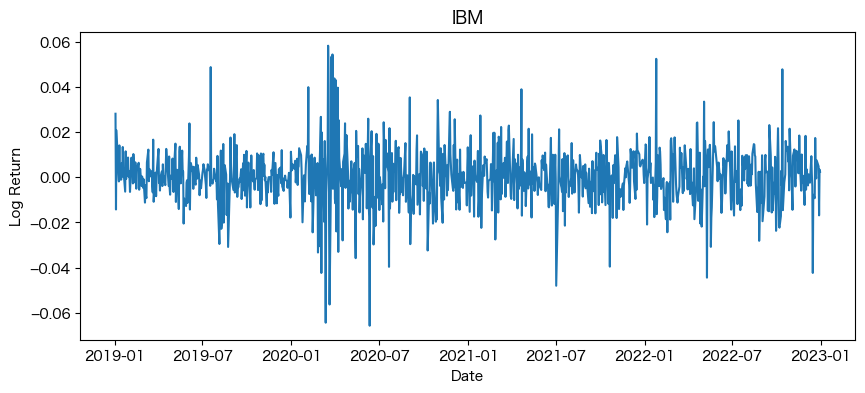

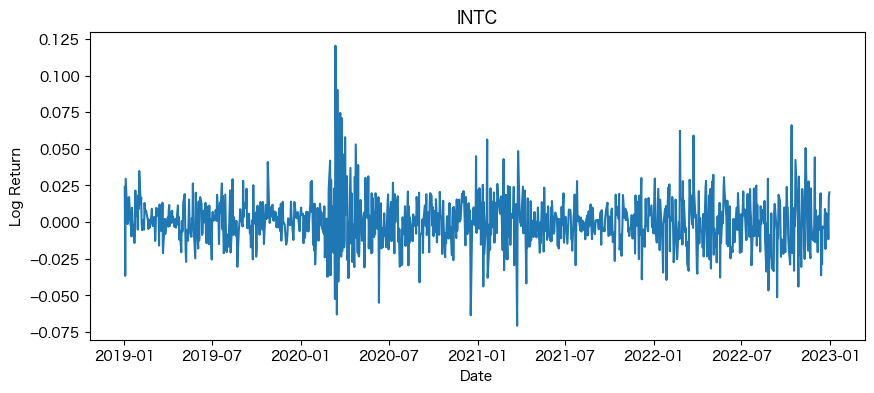

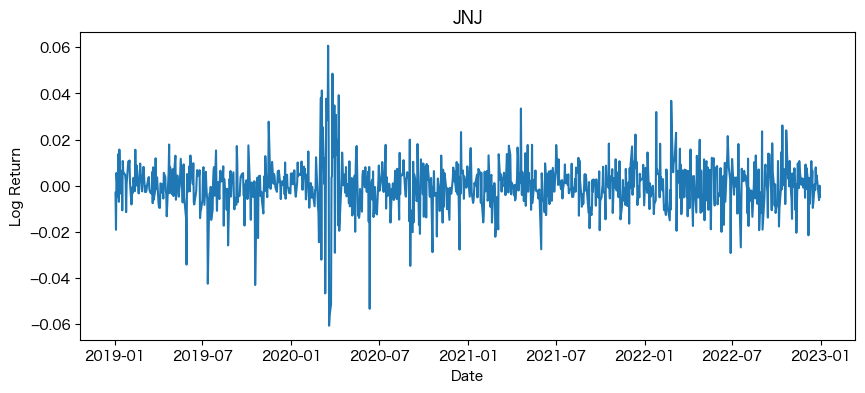

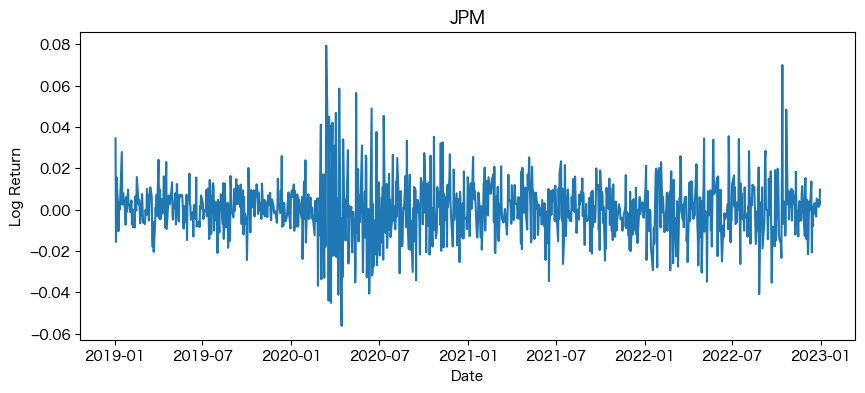

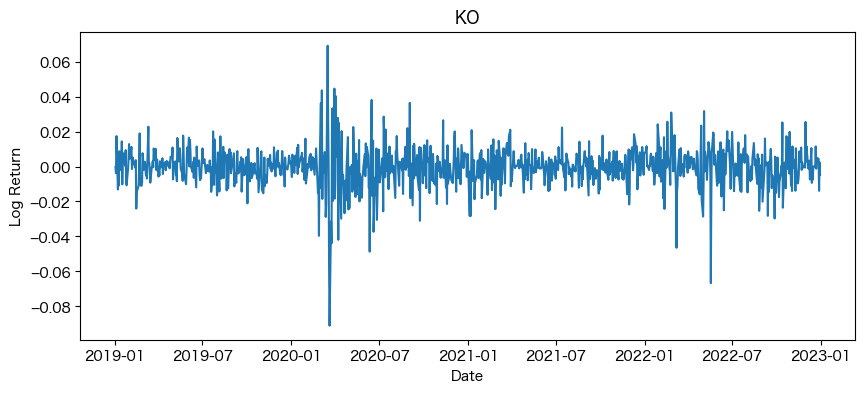

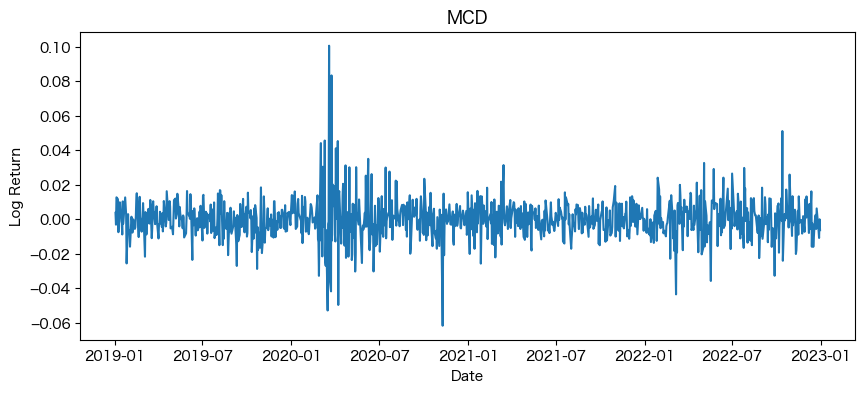

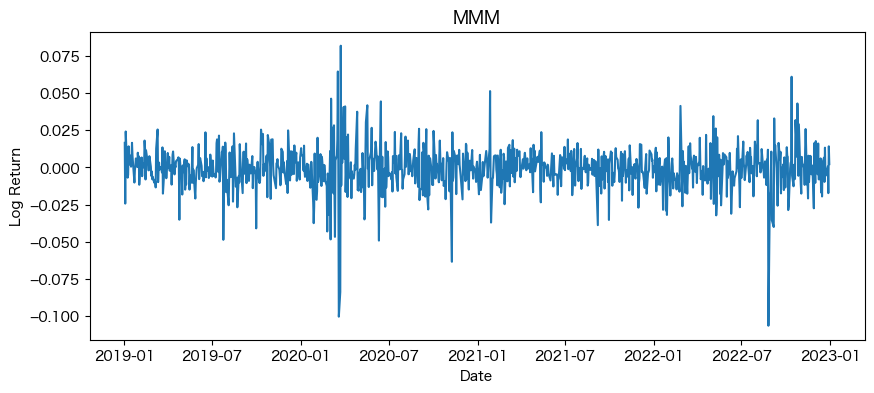

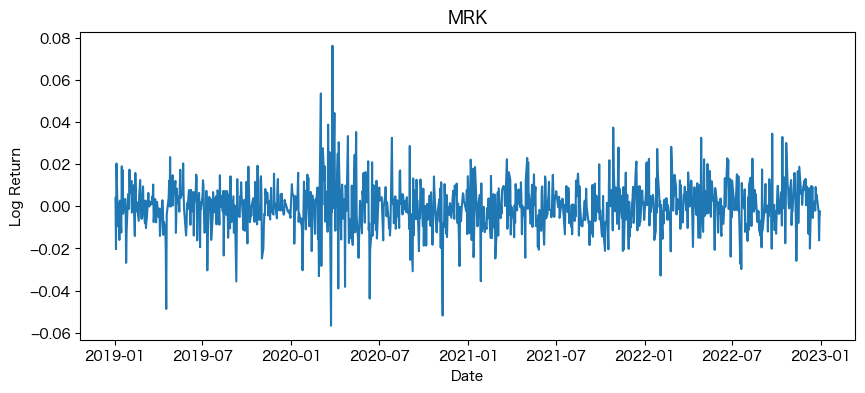

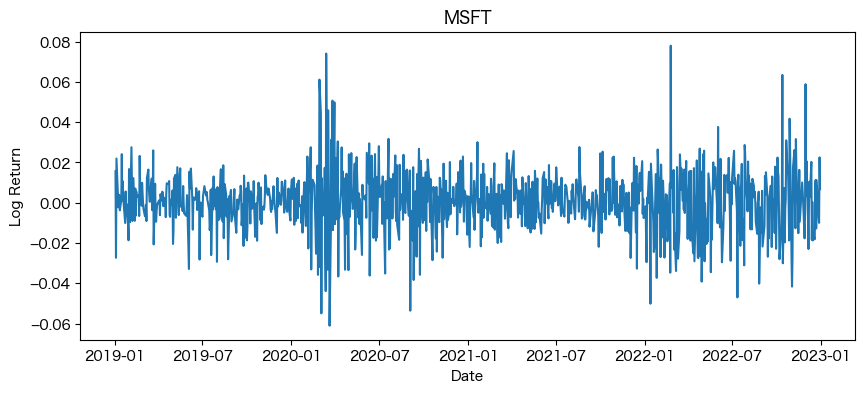

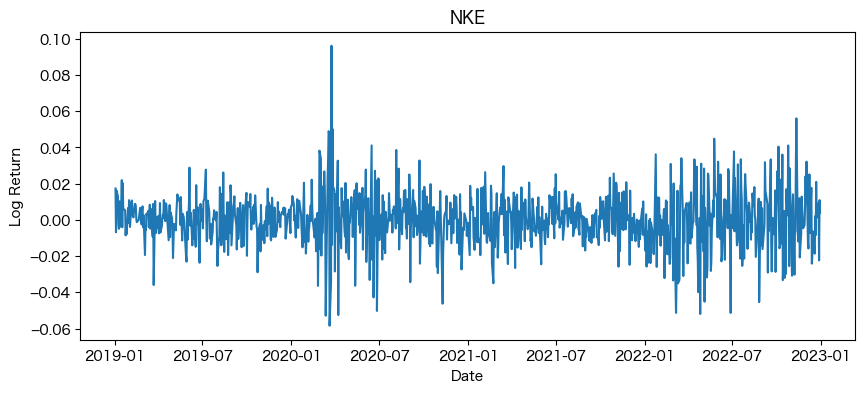

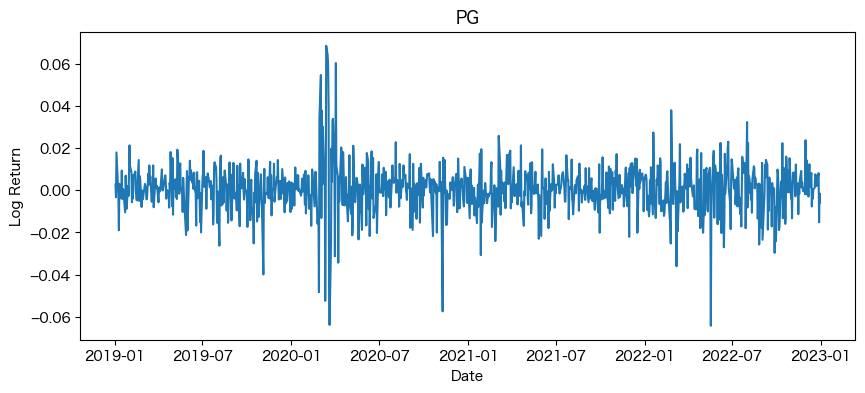

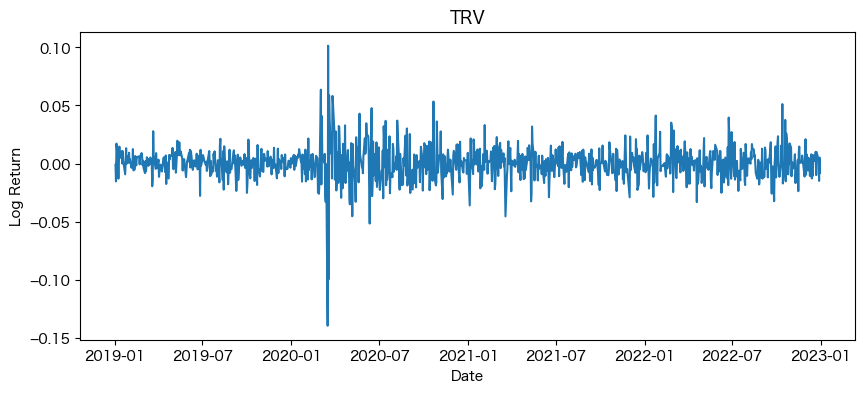

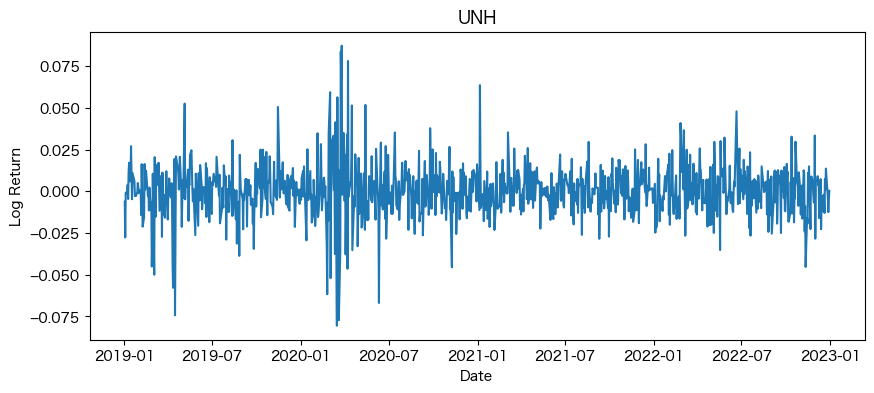

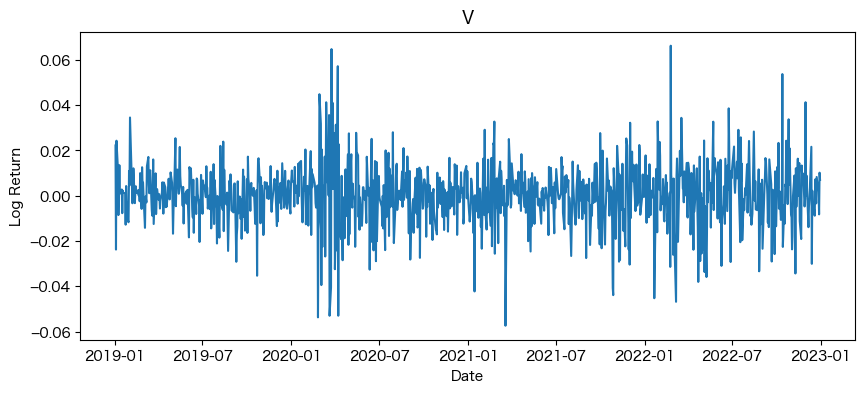

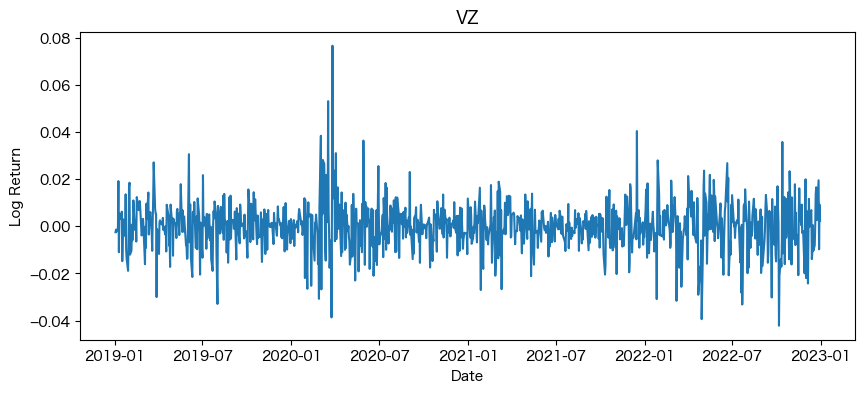

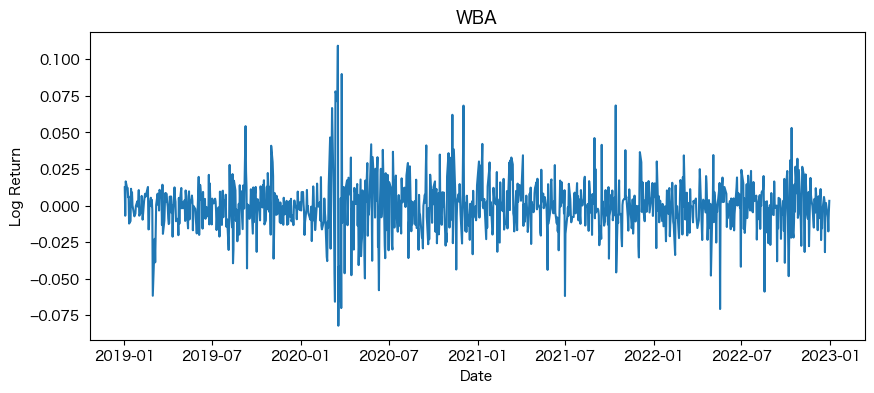

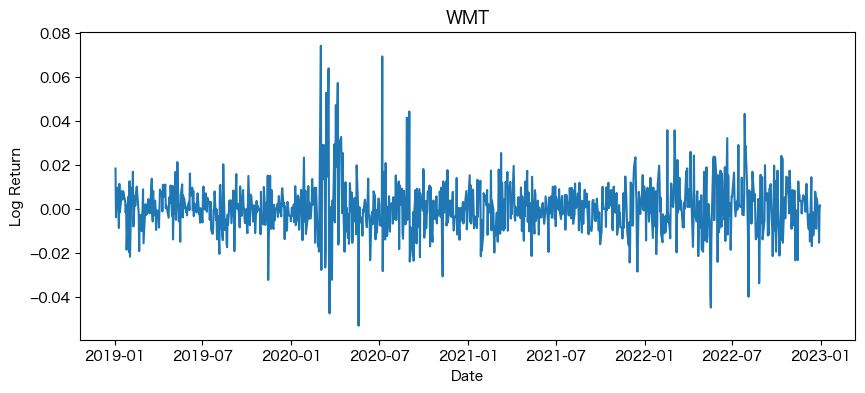

In [32]:
# 1行ずつ表示する例
for i, (symbol, log_return) in enumerate(log_returns_df.items()):
    plt.figure(figsize=(10, 4))  # グラフのサイズを設定
    plt.plot(log_return.index, log_return.values)  # データをプロット
    plt.title(symbol)  # グラフのタイトルを設定
    plt.xlabel('Date')  # x軸のラベルを設定
    plt.ylabel('Log Return')  # y軸のラベルを設定
    plt.show()  # グラフを表示
